In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset_renaming = {
    "mendelian_traits_matched_9": "Mendelian traits",
    "complex_traits_matched_9": "Complex traits",
}

subset_renaming = {
    "all": "All",
}

In [3]:
datasets = [
    "mendelian_traits_matched_9",
]

subsets = [
    "all",
]

models = [
    "CADD",
    "CADD+GPN-MSA_LLR",
    "CADD+Borzoi_L2_L2",
    "CADD+GPN-MSA_LLR+Borzoi_L2_L2",
]

def get_model_path(dataset, subset, model):
    return (
        f"../../results/dataset/{dataset}/metrics_by_chrom_weighted_average/"
        f"{subset}/{model}.LogisticRegression.chrom.csv"
    )

In [4]:
rows = []
for dataset in datasets:
    for subset in subsets:
        for model in models:
            path = get_model_path(dataset, subset, model)
            df = pd.read_csv(path).iloc[0]
            rows.append([
                dataset_renaming.get(dataset, dataset),
                subset_renaming.get(subset, subset),
                model,
                df["score"],
                df["se"]]
            )
df = pd.DataFrame(rows, columns=["dataset", "subset", "model", "AUPRC", "se"])
df

,dataset,subset,model,AUPRC,se
0,Mendelian traits,All,CADD,0.874660,0.030533
1,Mendelian traits,All,CADD+GPN-MSA_LLR,0.888816,0.025609
2,Mendelian traits,All,CADD+Borzoi_L2_L2,0.884345,0.028858
3,Mendelian traits,All,CADD+GPN-MSA_LLR+Borzoi_L2_L2,0.896619,0.026021


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


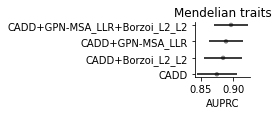

In [34]:
data = df.sort_values("AUPRC", ascending=False)
plt.figure(figsize=(1.0,1.0))
g = sns.pointplot(
    data=data,
    y="model",
    x="AUPRC",
    color="gray",
    join=False,
    #markersize=1,
    #s=10,
    scale=0.5,
)
plt.errorbar(
    x=data["AUPRC"],
    y=data["model"],
    xerr=data["se"],
    fmt='none',
    color="black",
)

g.set(
    ylabel="",
    #xlim=0.1,
)
plt.title("Mendelian traits")
sns.despine()
plt.savefig(f"../../results/plots/performance_ensemble_light_All.pdf", bbox_inches="tight")